<a href="https://colab.research.google.com/github/MonicaMedhat20/Web-Application-Firewall-WAF-Enhancement-/blob/main/FWAF_UPDATED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fwaf-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2871557%2F4951789%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240301%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240301T214412Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2a02a542e8dc258aecb886cd88c09aa1c7395de577d92259c7d2f1410c34e271330c953d2fcc9a13ce10036bed25aa1b59d4713e4594038db1b536351df60d87ccac09542a1a997ed81802a96b03c6e089c8768985800d8b229345e283d1962f697fa4a67b4b072129f42949e78eedbe8a88318787b7f64b7b6b06282004d33729e21fbc6d2b8ce9a5d68f76cc8cd7e11b67e11d21505c5659dcc4a35e10be22daab00602c89d58945be3f51811a2b08667e2025ef495993fce26b79578520bb7d9122aa6dfbcf85ad1070ef80c0879ab4e457b8d934f8151717c7e54af19967270e0431fd4ab77250a3fc5ee888112e00f84fbd8a6fd97230444ffd63ad4606,payload-full2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4522327%2F7737769%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240301%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240301T214412Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2c3b741693006fdc17c98fbc5b0287e86317ce3b11aa5d71afb3213c7ac9f88ee2bcfe689e078744dd1445578b0cc58631a2e2b18e3d80f6b7ecb8dc52a03d3345317f12c6e1cc2ef4cda6a5df3f2d2f94d6b52d9519b24b138b62a1cc06f178683c7f08727f703dfac165cc8497a618722889f1ffeaa6e7f70fdc42b37820aa93e53c16d2878bba18d4a3795d6a2c0f34d186339870ac5586aaa78fee648d4619cada0ed6c7e851421722ad8827b890f4bcab8638ca137c14cc2fc029fa85e1c271dbe8a72fe5f1a62e1a7c6763cecebd167abc6d239e20d19096a00d382b863702aa4df40554636cdd0f2e2e4f123c1a49db44658a19766ae0bf3be6fde626'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 11205605 bytes downloaded
Downloaded and uncompressed: fwaf-dataset
[==================================================] 391637 bytes downloaded
Downloaded and uncompressed: payload-full2
Data source import complete.


In [2]:
!pip uninstall -y apache-beam chex momepy pymc3 ydata-profiling
!pip install numpy==1.23.5

Found existing installation: chex 0.1.85
Uninstalling chex-0.1.85:
  Successfully uninstalled chex-0.1.85
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 40.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
optax 0.1.9 requires chex>=0.1.7, which is not installed.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import re
# import math
# import eli5

#dataset pre-processing realated imports
import sklearn
# from eli5.sklearn import PermutationImportance
from urllib.parse import urlparse
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



#imports related to classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
#DNN imports
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau

#Explainability imports
from sklearn.inspection import PartialDependenceDisplay


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
print('Done!')

/kaggle/input/fwaf-dataset/badqueries.txt
/kaggle/input/fwaf-dataset/goodqueries.txt
/kaggle/input/payload-full2/payload_full.csv
Done!


**READING CSV FILE**

In [3]:
filepath='/kaggle/input/payload-full2/payload_full.csv'
fwaf_data=pd.read_csv(filepath)
print('Done!')

Done!


In [4]:
n_features=fwaf_data.shape[1]
n_samples =fwaf_data.shape[0]


print("Number of samples:", n_samples)
print("Number of features:", n_features)

Number of samples: 31067
Number of features: 4


In [5]:
fwaf_data.head()

,payload,length,attack_type,label
0,c/ caridad s/n,14,norm,norm
1,"campello, el",12,norm,norm
2,40184,5,norm,norm
3,1442431887503330,16,norm,norm
4,nue37,5,norm,norm


In [6]:
fwaf_data.tail()

,payload,length,attack_type,label
31062,"<script a="">"" id=xss src=""http://ha.ckers.org/...",63,xss,anom
31063,"<script a="">"" '' id=xss src=""http://ha.ckers.o...",66,xss,anom
31064,"<script ""a='>'"" id=xss src=""http://ha.ckers.or...",65,xss,anom
31065,"<script a=`>` id=xss src=""http://ha.ckers.org/...",63,xss,anom
31066,"<script>document.write(""<scri"");</script>pt id...",93,xss,anom


In [7]:
fwaf_data.columns

Index(['payload', 'length', 'attack_type', 'label'], dtype='object')

In [8]:
fwaf_data.head()

,payload,length,attack_type,label
0,c/ caridad s/n,14,norm,norm
1,"campello, el",12,norm,norm
2,40184,5,norm,norm
3,1442431887503330,16,norm,norm
4,nue37,5,norm,norm


# **Data Visualization**

<Axes: xlabel='label', ylabel='count'>

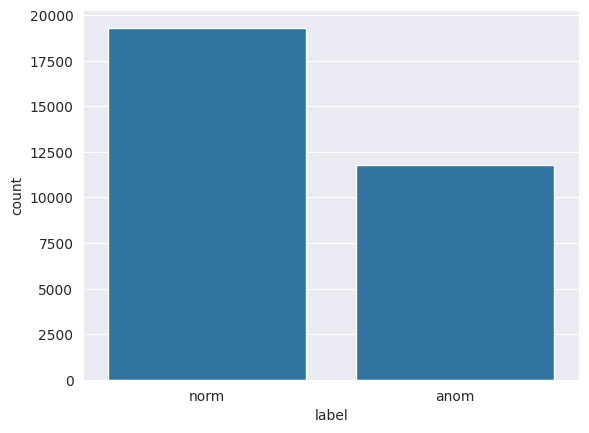

In [9]:
sns.set_style('darkgrid')
sns.countplot(data= fwaf_data, x='label')

In [10]:
feature_names=[ 'payload', 'length', 'attack_type', 'label']

X=fwaf_data[feature_names]
print(X)

                                                 payload  length attack_type  \
0                                         c/ caridad s/n      14        norm   
1                                           campello, el      12        norm   
2                                                  40184       5        norm   
3                                       1442431887503330      16        norm   
4                                                  nue37       5        norm   
...                                                  ...     ...         ...   
31062  <script a=">" id=xss src="http://ha.ckers.org/...      63         xss   
31063  <script a=">" '' id=xss src="http://ha.ckers.o...      66         xss   
31064  <script "a='>'" id=xss src="http://ha.ckers.or...      65         xss   
31065  <script a=`>` id=xss src="http://ha.ckers.org/...      63         xss   
31066  <script>document.write("<scri");</script>pt id...      93         xss   

      label  
0      norm  
1      norm

# **Preprocessing [on column payload]**

In [11]:
print(X.payload)

0                                           c/ caridad s/n
1                                             campello, el
2                                                    40184
3                                         1442431887503330
4                                                    nue37
                               ...                        
31062    <script a=">" id=xss src="http://ha.ckers.org/...
31063    <script a=">" '' id=xss src="http://ha.ckers.o...
31064    <script "a='>'" id=xss src="http://ha.ckers.or...
31065    <script a=`>` id=xss src="http://ha.ckers.org/...
31066    <script>document.write("<scri");</script>pt id...
Name: payload, Length: 31067, dtype: object


In [12]:
X['payload'] = X['payload'].astype(str)
X['payload'] = X['payload'].str.extract(r'(\d+)')
X['payload'] = pd.to_numeric(X['payload'], errors='coerce').fillna(0)
print(X.payload)

0        0.000000e+00
1        0.000000e+00
2        4.018400e+04
3        1.442432e+15
4        3.700000e+01
             ...     
31062    0.000000e+00
31063    0.000000e+00
31064    0.000000e+00
31065    0.000000e+00
31066    0.000000e+00
Name: payload, Length: 31067, dtype: float64


In [13]:
X['attack_type'] = X['attack_type'].astype(str)
X['attack_type'] = X['attack_type'].str.extract(r'(\d+)')
X['attack_type'] = pd.to_numeric(X['attack_type'], errors='coerce').fillna(0)
print(X.attack_type)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
31062    0.0
31063    0.0
31064    0.0
31065    0.0
31066    0.0
Name: attack_type, Length: 31067, dtype: float64


In [14]:
filtered_length = X.loc[X['attack_type'] == 'norm', 'length']
print(filtered_length)

Series([], Name: length, dtype: int64)


# **Building final dataset to be used for classification**

In [15]:
y=X['label']
print(y)

0        norm
1        norm
2        norm
3        norm
4        norm
         ... 
31062    anom
31063    anom
31064    anom
31065    anom
31066    anom
Name: label, Length: 31067, dtype: object


In [16]:
X['label'] = X['label'].astype(str)
X['label'] = X['label'].str.extract(r'(\d+)')
X['label'] = pd.to_numeric(X['label'], errors='coerce').fillna(0)
print(X.label)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
31062    0.0
31063    0.0
31064    0.0
31065    0.0
31066    0.0
Name: label, Length: 31067, dtype: float64


In [17]:
labels=['payload', 'length', 'attack_type']
print(X[labels])

            payload  length  attack_type
0      0.000000e+00      14          0.0
1      0.000000e+00      12          0.0
2      4.018400e+04       5          0.0
3      1.442432e+15      16          0.0
4      3.700000e+01       5          0.0
...             ...     ...          ...
31062  0.000000e+00      63          0.0
31063  0.000000e+00      66          0.0
31064  0.000000e+00      65          0.0
31065  0.000000e+00      63          0.0
31066  0.000000e+00      93          0.0

[31067 rows x 3 columns]


In [18]:
print('computing...')
#split dataset in test and train
x_tr, x_ts, y_tr, y_ts = train_test_split(X[labels], y, test_size=0.3, random_state=0)


print('Done!')

computing...
Done!


In [19]:
x_tr.head(5)

,payload,length,attack_type
15988,1.0,80,0.0
14350,1.0,82,0.0
17252,1.0,84,0.0
9196,9516.0,4,0.0
14690,1.0,85,0.0


In [20]:
x_tr.tail(5)

,payload,length,attack_type
13123,1.0,137,0.0
19648,0.0,9,0.0
9845,127.0,16,0.0
10799,1.0,114,0.0
2732,65223156.0,9,0.0


# **Classifiers**

**Recurrent Neural Network(RNN)**


In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# Assuming x_tr, y_tr, x_ts, y_ts are your training and testing data
# Ensure they are numpy arrays or can be converted to numpy arrays
# Ensure that y_tr and y_ts are properly encoded (binary labels)

# Example label encoding for binary classification
label_encoder = LabelEncoder()
y_tr_encoded = label_encoder.fit_transform(y_tr)
y_ts_encoded = label_encoder.transform(y_ts)

# Reshape x_tr and x_ts if necessary (assuming they are 2D arrays)
# Add this if x_tr and x_ts are 1D arrays: x_tr = x_tr.reshape(-1, 1)

# Initialize RNN model
RNN_model = Sequential()
RNN_model.add(SimpleRNN(50, input_shape=(x_tr.shape[1], 1), activation='relu'))
RNN_model.add(Dense(units=1, activation='sigmoid'))  # Adjust units and activation based on your task

# Compile the model
RNN_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
RNN_model.fit(x_tr, y_tr_encoded, epochs=20, batch_size=32, validation_data=(x_ts, y_ts_encoded))

# Evaluate the model
accuracy = RNN_model.evaluate(x_ts, y_ts_encoded)[1]

print(f'Accuracy: {accuracy}')


Epoch 1/20
680/680 [==============================] - 4s 4ms/step - loss: 82996076544.0000 - accuracy: 0.8517 - val_loss: 28.4979 - val_accuracy: 0.8491
Epoch 2/20
680/680 [==============================] - 2s 4ms/step - loss: 6925947904.0000 - accuracy: 0.8775 - val_loss: 65.8986 - val_accuracy: 0.8968
Epoch 3/20
680/680 [==============================] - 2s 4ms/step - loss: 461568576.0000 - accuracy: 0.8748 - val_loss: 320.3272 - val_accuracy: 0.9014
Epoch 4/20
680/680 [==============================] - 3s 4ms/step - loss: 5885443584.0000 - accuracy: 0.8843 - val_loss: 682.2137 - val_accuracy: 0.8986
Epoch 5/20
680/680 [==============================] - 3s 4ms/step - loss: 8484723200.0000 - accuracy: 0.8616 - val_loss: 1076.2319 - val_accuracy: 0.8872
Epoch 6/20
680/680 [==============================] - 2s 4ms/step - loss: 4084563456.0000 - accuracy: 0.8336 - val_loss: 1973.4946 - val_accuracy: 0.8636
Epoch 7/20
680/680 [==============================] - 2s 4ms/step - loss: 309032.7

**Artificial Neural Network(ANN)**


In [22]:

# Assuming x_tr, y_tr, x_ts, y_ts are your training and testing data
# Ensure they are numpy arrays or can be converted to numpy arrays
# Ensure that y_tr and y_ts are properly encoded (binary labels)

# Example label encoding for binary classification
label_encoder = LabelEncoder()
y_tr_encoded = label_encoder.fit_transform(y_tr)
y_ts_encoded = label_encoder.transform(y_ts)

# Initialize ANN model
ANN_model = Sequential()
ANN_model.add(Dense(50, input_shape=(x_tr.shape[1],), activation='relu'))
ANN_model.add(Dense(units=1, activation='sigmoid'))  # Adjust units and activation based on your task

# Compile the model
ANN_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ANN_model.fit(x_tr, y_tr_encoded, epochs=20, batch_size=32, validation_data=(x_ts, y_ts_encoded))

# Evaluate the model
accuracy = ANN_model.evaluate(x_ts, y_ts_encoded)[1]

print(f'Accuracy: {accuracy}')


Epoch 1/20
680/680 [==============================] - 6s 5ms/step - loss: 3284302.2500 - accuracy: 0.7449 - val_loss: 16.0755 - val_accuracy: 0.8275
Epoch 2/20
680/680 [==============================] - 2s 2ms/step - loss: 3827.8496 - accuracy: 0.8377 - val_loss: 12.0903 - val_accuracy: 0.8556
Epoch 3/20
680/680 [==============================] - 2s 2ms/step - loss: 3824.4839 - accuracy: 0.8782 - val_loss: 9.3661 - val_accuracy: 0.8841
Epoch 4/20
680/680 [==============================] - 2s 3ms/step - loss: 3822.1069 - accuracy: 0.9007 - val_loss: 7.3534 - val_accuracy: 0.8846
Epoch 5/20
680/680 [==============================] - 2s 3ms/step - loss: 3820.3977 - accuracy: 0.9026 - val_loss: 5.8799 - val_accuracy: 0.9024
Epoch 6/20
680/680 [==============================] - 2s 4ms/step - loss: 3819.1072 - accuracy: 0.9105 - val_loss: 4.7266 - val_accuracy: 0.9158
Epoch 7/20
680/680 [==============================] - 2s 2ms/step - loss: 3818.1841 - accuracy: 0.9169 - val_loss: 3.9484 - v

**Convolutional Neural Network(CNN)**


In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Assuming x_tr, y_tr, x_ts, y_ts are your training and testing data DataFrames
# Convert DataFrames to numpy arrays
x_tr = x_tr.to_numpy()
x_ts = x_ts.to_numpy()

# Example label encoding for binary classification
label_encoder = LabelEncoder()
y_tr_encoded = label_encoder.fit_transform(y_tr)
y_ts_encoded = label_encoder.transform(y_ts)

# Reshape x_tr and x_ts to match the input shape expected by the model
x_tr = x_tr.reshape(x_tr.shape[0], -1)  # Flattens the input to a 1D array
x_ts = x_ts.reshape(x_ts.shape[0], -1)  # Flattens the input to a 1D array

# Initialize the model
model = Sequential()
model.add(Flatten(input_shape=(x_tr.shape[1],)))  # Flattens the input
model.add(Dense(64, activation='relu'))  # Add a dense layer with 64 neurons and ReLU activation
model.add(Dense(32, activation='relu'))  # Add another dense layer with 32 neurons and ReLU activation
model.add(Dense(units=1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_tr, y_tr_encoded, epochs=20, batch_size=32, validation_data=(x_ts, y_ts_encoded))

# Evaluate the model
accuracy = model.evaluate(x_ts, y_ts_encoded)[1]

print(f'Accuracy: {accuracy}')


Epoch 1/20
680/680 [==============================] - 3s 3ms/step - loss: 4184004352.0000 - accuracy: 0.8302 - val_loss: 241.5449 - val_accuracy: 0.8863
Epoch 2/20
680/680 [==============================] - 2s 3ms/step - loss: 39841.4023 - accuracy: 0.8800 - val_loss: 114.4739 - val_accuracy: 0.8683
Epoch 3/20
680/680 [==============================] - 2s 3ms/step - loss: 25177.8984 - accuracy: 0.8862 - val_loss: 63.1315 - val_accuracy: 0.9041
Epoch 4/20
680/680 [==============================] - 2s 2ms/step - loss: 19463.5156 - accuracy: 0.9082 - val_loss: 1.1663 - val_accuracy: 0.9352
Epoch 5/20
680/680 [==============================] - 2s 2ms/step - loss: 7823639552.0000 - accuracy: 0.9091 - val_loss: 329.1523 - val_accuracy: 0.8858
Epoch 6/20
680/680 [==============================] - 3s 4ms/step - loss: 78417.6719 - accuracy: 0.8982 - val_loss: 277.7574 - val_accuracy: 0.8992
Epoch 7/20
680/680 [==============================] - 2s 3ms/step - loss: 78379.6719 - accuracy: 0.9037 -

**Bidirectional Encoder Representations from Transformers(BERT)**


In [ ]:
pip install transformers tensorflow


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam

# Assuming x_tr, y_tr, x_ts, y_ts are your training and testing data
# Ensure they are numpy arrays or can be converted to numpy arrays
# Ensure that y_tr and y_ts are properly encoded (binary labels)

# Example label encoding for binary classification
label_encoder = LabelEncoder()
y_tr_encoded = label_encoder.fit_transform(y_tr)
y_ts_encoded = label_encoder.transform(y_ts)

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Convert input data to strings if not already in the correct format
x_tr_texts = [str(text) for text in x_tr]
x_ts_texts = [str(text) for text in x_ts]

# Tokenize inputs
x_tr_tokens = tokenizer(x_tr_texts, padding=True, truncation=True, return_tensors='tf')
x_ts_tokens = tokenizer(x_ts_texts, padding=True, truncation=True, return_tensors='tf')

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=2e-5)  # Instantiate Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Pass 'adam' as optimizer identifier

# Train the model
model.fit(x_tr_tokens, y_tr_encoded, epochs=3, batch_size=8, validation_data=(x_ts_tokens, y_ts_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(x_ts_tokens, y_ts_encoded)
print(f'Accuracy: {accuracy}')


**Long Short-Term Memory(LSTM)**


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Assuming x_tr, y_tr, x_ts, y_ts are your training and testing data
# Ensure they are numpy arrays or can be converted to numpy arrays
# Ensure that y_tr and y_ts are properly encoded (binary labels)

# Example label encoding for binary classification
label_encoder = LabelEncoder()
y_tr_encoded = label_encoder.fit_transform(y_tr)
y_ts_encoded = label_encoder.transform(y_ts)

# Reshape x_tr and x_ts if necessary (assuming they are 2D arrays)
# Add this if x_tr and x_ts are 1D arrays: x_tr = x_tr.reshape(-1, 1)

# Initialize LSTM model
LSTM_model = Sequential()
LSTM_model.add(LSTM(50, input_shape=(x_tr.shape[1], 1), activation='relu'))
LSTM_model.add(Dense(units=1, activation='sigmoid'))  # Adjust units and activation based on your task

# Compile the model
LSTM_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
LSTM_model.fit(x_tr, y_tr_encoded, epochs=20, batch_size=32, validation_data=(x_ts, y_ts_encoded))

# Evaluate the model
accuracy = LSTM_model.evaluate(x_ts, y_ts_encoded)[1]

print(f'Accuracy: {accuracy}')


Epoch 1/20
680/680 [==============================] - 6s 6ms/step - loss: 113283653632.0000 - accuracy: 0.8776 - val_loss: 0.5427 - val_accuracy: 0.9216
Epoch 2/20
680/680 [==============================] - 6s 10ms/step - loss: 140.9827 - accuracy: 0.9502 - val_loss: 0.1194 - val_accuracy: 0.9680
Epoch 3/20
680/680 [==============================] - 4s 5ms/step - loss: 1123171712.0000 - accuracy: 0.9338 - val_loss: 0.1696 - val_accuracy: 0.9092
Epoch 4/20
680/680 [==============================] - 4s 6ms/step - loss: 544396.5625 - accuracy: 0.9051 - val_loss: 1.7310 - val_accuracy: 0.9067
Epoch 5/20
680/680 [==============================] - 3s 4ms/step - loss: 304.0492 - accuracy: 0.9068 - val_loss: 1.5427 - val_accuracy: 0.9106
Epoch 6/20
680/680 [==============================] - 3s 5ms/step - loss: 225.7545 - accuracy: 0.9140 - val_loss: 0.7528 - val_accuracy: 0.9166
Epoch 7/20
680/680 [==============================] - 3s 4ms/step - loss: 190.2266 - accuracy: 0.9230 - val_loss: 0.

**Ranking the trained models on the MAE Value**

In [ ]:
from sklearn.metrics import accuracy_score

model_preds = [RT_predictions, knn_predictions, DT_predictions, LR_predictions, SVC_predictions, NB_predictions]
model_names = ['Random Forest', 'K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression', 'SVC', 'NB']

# Function for comparing different models
def score_model(model_preds, y_ts):
    return accuracy_score(y_ts, model_preds)

# Calculate Accuracy for each model
acc_score = []
for i in range(len(model_names)):
    acc = score_model(model_preds[i], y_ts)
    acc_score.append((model_names[i], acc))

acc_scores_sorted = sorted(acc_score, key=lambda x: x[1], reverse= True)
target_range = y_ts.max() - y_ts.min()

# Print ranked model names, MAE scores, and error percentages
# for i, (model_name, acc) in enumerate(acc_scores_sorted):
#     error_percent = (mae / target_range) * 100  # Calculate error percentage
#     print("Rank %d: %s - Accuracy: %.4f - : %.2f%%" % (i+1, model_name, acc, error_percent))
print("Done!")

In [ ]:
model_preds = [RT_predictions, knn_predictions, DT_predictions, LR_predictions, SVC_predictions, NB_predictions]
model_names = ['Random Forest', 'K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression','SVC', 'NB']

# Calculate Accuracy for each model
acc_score = []
for i in range(len(model_names)):
    acc = score_model(model_preds[i], y_ts)
    acc_score.append((model_names[i], acc))

acc_scores_sorted = sorted(acc_score, key=lambda x: x[1], reverse= True)
target_range = y_ts.max() - y_ts.min()

# Print ranked model names, Accuracy scores, and Accuracy percentages
for i, (model_name, acc) in enumerate(acc_scores_sorted):
    error_percent = (acc / target_range) * 100  # Calculate error percentage
    print("Rank %d: %s - ACC: %.4f - Accuracy: %.2f%%" % (i+1, model_name, acc, error_percent))